# Descripción del dataset

Usando el conjunto de datos de [food-101](https://www.kaggle.com/datasets/dansbecker/food-101) que nos presenta un archivo comprimido con miles de imágenes de comidas comunes.

Por el cual procedemos a mostrar por medio de un *Dataframe* de la librería **pandas** los labels existentes en nuestro dataset.

Posteriormente, en el siguiente apartado se quiere buscar la dirección de la imágen según el orden de los directorios que se manejan de la siguiente forma ***Comida*/*número del archivo***. Se busca tomar los primeros 2 una vez que se haya usado el método *shuffle* que busca reordenar el arreglo de forma aleatoria, para de esta forma mostrar algunas de las imágenes existentes, si se desea poder ver más imágenes se puede volver a correr los correspondientes bloques de código. 


In [7]:
# Declaración de algunos de los paquetes que se estarán utilizando dentro de este archivo
import time, cv2, os
import pandas as pd
from random import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import ShuffleSplit # Función para reordenar los datos de entrenamiento, haciendo dos conjuntos para entrenamiento y pruebas para asegurarse que el modelo esté siendo entrenado de la manera correcta. 

In [8]:
PATH = "../../dataset/food-101/food-101/meta/labels.txt"
LABELS = []
print("Extracting labels...")
time.sleep(2)

with open(PATH, "r") as labels:
    for line in labels:
        LABELS.append(line[:-1])

df_labels = pd.DataFrame(data=LABELS, columns=["Labels"])
df_labels

Extracting labels...


,Labels
0,Apple pie
1,Baby back ribs
2,Baklava
3,Beef carpaccio
4,Beef tartare
...,...
96,Tacos
97,Takoyaki
98,Tiramisu
99,Tuna tartare


In [9]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data for show images...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES_COPY = IMG_NAMES[:2]

df_img_names = pd.DataFrame(columns=["Label","Name"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[0], name.split("/")[1]]], columns=["Label","Name"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)
df_img_names        

Extracting data for show images...


,Label,Name
0,omelette,303950
1,cheesecake,3468925
2,peking_duck,3520639
3,caprese_salad,910255
4,carrot_cake,3507001
...,...,...
25245,gyoza,175891
25246,spring_rolls,2399746
25247,fried_rice,137130
25248,filet_mignon,384251


## Extracción de las imagenes

Por medio de la extracción del nombre de las imágenes en el proceso anterior las pasamos por la función *imread* de la librería *cv2* que nos permitirá leer las imágenes y tenerlas en un arreglo para su posterior presentación con la librería **matplotlib**

In [10]:
images = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{img}.jpg') for img in IMG_NAMES_COPY]

Text(0.5, 0, 'cheesecake')

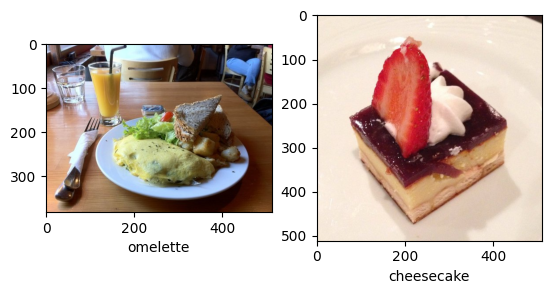

In [11]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[0].split("/")[0])
plt.margins(y=10)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[1].split("/")[0])

# Vista minable

A partir del preview anterior tenemos una idea del proceso del cuál será parte la extracción de los datos para el modelo que se desea entrenar. Tomamos el mismo proceso anterior pero apartando 1000 imágenes que serán tomadas como imágenes de entrenamiento y prueba del modelo basado en las etiquetas que se tomen primero que serán guardadas en un archivo aparte para poder usarlas posteriormente.

In [12]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data for show images...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES = IMG_NAMES[:1000]

df_img_names = pd.DataFrame(columns=["Label","Name"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[0], name.split("/")[1]]], columns=["Label","Name"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)
df_img_names["Label"].unique()

Extracting data for show images...


array(['creme_brulee', 'oysters', 'mussels', 'tuna_tartare', 'tacos',
       'club_sandwich', 'beef_tartare', 'cheesecake', 'croque_madame',
       'baby_back_ribs', 'cheese_plate', 'huevos_rancheros',
       'caesar_salad', 'pizza', 'tiramisu', 'eggs_benedict',
       'grilled_salmon', 'deviled_eggs', 'bread_pudding', 'foie_gras',
       'hot_and_sour_soup', 'spaghetti_carbonara', 'falafel', 'ice_cream',
       'hummus', 'chicken_curry', 'chocolate_cake', 'scallops',
       'beet_salad', 'macarons', 'sashimi', 'crab_cakes', 'nachos',
       'pancakes', 'carrot_cake', 'prime_rib', 'baklava', 'french_toast',
       'pad_thai', 'chicken_wings', 'caprese_salad', 'lobster_bisque',
       'edamame', 'cannoli', 'gyoza', 'shrimp_and_grits', 'hamburger',
       'pulled_pork_sandwich', 'spaghetti_bolognese', 'apple_pie',
       'donuts', 'waffles', 'beignets', 'red_velvet_cake', 'sushi',
       'french_onion_soup', 'lobster_roll_sandwich', 'omelette',
       'onion_rings', 'samosa', 'pho', 'pek

In [13]:
os.makedirs('../../dataset/vista_minable/meta', exist_ok=True)
df_img_names.to_csv('../../dataset/vista_minable/meta/train_test_labels.csv', encoding='utf-8', index=False)

## Procesamiento de las imagenes para entrenamiento

Una vez procesada la información de las imágenes que serán usadas para el entrenamiento del modelo procedemos a identificar las imágenes con un algoritmo que nos permite redimencionarlas para que sea más fácil para el modelo identificar las diferencias entre las mismas para de esta forma clasificarlas. Utilizaremos los siguientes pasos

1. Sacar la información guardada en el archivo de la vista minable.
2. Pasar cada imagen por la función resize de nuestra librería para asegurarnos que la misma tenga el formato deseado (28x28).
3. Bajo un esquema similar al de la extracción de imágenes que se muestra con anterioridad pero con las 1000 imágenes que fueron apartadas.

In [15]:
df_img = pd.read_csv('../../dataset/vista_minable/meta/train_test_labels.csv')
df_img

,Label,Name
0,creme_brulee,2606410
1,oysters,3164740
2,mussels,3467659
3,tuna_tartare,538827
4,tacos,1707011
...,...,...
995,cup_cakes,1583626
996,grilled_salmon,1757276
997,omelette,2835899
998,chocolate_cake,3493807


In [36]:
for label, name in df_img.values:
    print(f'{label}/{name}')

creme_brulee/2606410
oysters/3164740
mussels/3467659
tuna_tartare/538827
tacos/1707011
club_sandwich/3443497
beef_tartare/77161
cheesecake/2023629
croque_madame/1554222
baby_back_ribs/312370
cheese_plate/1550171
huevos_rancheros/1033838
beef_tartare/2289872
caesar_salad/615775
pizza/2019408
tiramisu/2060392
eggs_benedict/3618947
oysters/3333406
cheese_plate/1266840
eggs_benedict/2569502
grilled_salmon/813791
deviled_eggs/2135193
bread_pudding/2280724
bread_pudding/3030332
tuna_tartare/3025223
foie_gras/1217089
caesar_salad/2270905
hot_and_sour_soup/1063800
spaghetti_carbonara/1331980
spaghetti_carbonara/276485
huevos_rancheros/3132633
falafel/150112
ice_cream/3743054
hummus/779819
chicken_curry/1213873
chocolate_cake/2537325
scallops/1262105
beet_salad/3619062
macarons/1627640
scallops/2016381
sashimi/2995174
crab_cakes/7802
crab_cakes/3220950
caesar_salad/1750307
nachos/2324402
pancakes/3613390
carrot_cake/1046933
prime_rib/90923
baklava/3067354
french_toast/190629
pad_thai/2309854
ch